In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from collections import Counter

In [82]:
with open('dictionary.pickle', 'rb') as handle:
    dictionary = pickle.load(handle)
with open('corpus.pickle', 'rb') as handle:
    corpus = pickle.load(handle)
with open('lda.pickle', 'rb') as handle:
    lda = pickle.load(handle)

num_topics = lda.num_topics
assign_dict = dict()

for i in range(len(corpus)):
    for assign in range(1,num_topics+2):
        key = str(assign)
        try:
            assign_dict[key] = assign_dict.get(key, []) + [lda[corpus[i]][assign-1][0]]
        except IndexError:
            assign_dict[key] = assign_dict.get(key, []) + [0]
        
def assign_distribution(assign_dict):
    try:
        assign_df = pd.DataFrame(assign_dict)
        col_names = assign_df.columns
        colors = ['black','blue','red','green','purple','yellow']
        for col_name,color in zip(col_names,colors):
            label = 'assign'+col_name
            assign_df[col_name].plot.kde(color = color,figsize=(15,6),label=label)
            plt.legend(loc='best')
            plt.xlabel('topics')
            plt.ylabel('density')
            plt.xlim((1,num_topics+1))
            plt.title('Topic Assignment',fontsize=20)
    except:
        pass

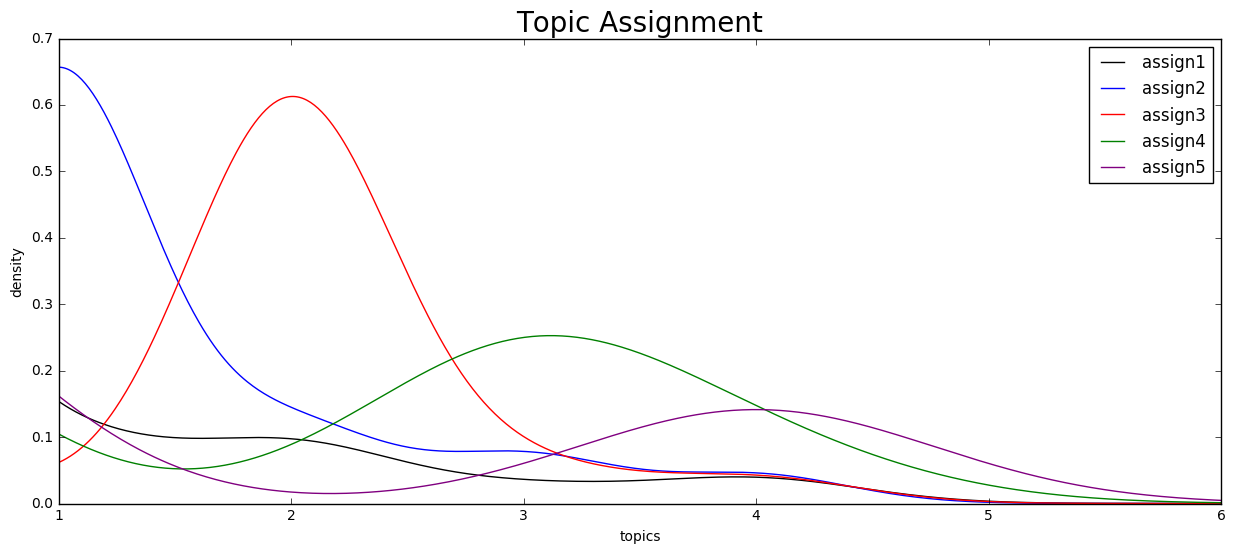

In [83]:
assign_distribution(assign_dict)

In [84]:
lda.show_topics(num_topics,15)

[(0,
  '0.010*"policy" + 0.006*"business" + 0.006*"network" + 0.006*"sector" + 0.006*"infrastructure" + 0.006*"internet" + 0.006*"measure" + 0.006*"technology" + 0.005*"attack" + 0.005*"access" + 0.005*"threat" + 0.005*"management" + 0.005*"state" + 0.005*"implementation" + 0.005*"support"'),
 (1,
  '0.010*"threat" + 0.008*"digital" + 0.007*"network" + 0.007*"policy" + 0.006*"public" + 0.006*"infrastructure" + 0.006*"sector" + 0.005*"action" + 0.005*"level" + 0.005*"technology" + 0.005*"attack" + 0.005*"business" + 0.005*"internet" + 0.005*"program" + 0.004*"ensure"'),
 (2,
  '0.009*"threat" + 0.008*"technology" + 0.008*"policy" + 0.006*"infrastructure" + 0.006*"sector" + 0.006*"state" + 0.005*"digital" + 0.005*"system" + 0.005*"capability" + 0.005*"ensure" + 0.005*"business" + 0.005*"network" + 0.005*"action" + 0.005*"access" + 0.005*"framework"'),
 (3,
  '0.007*"technology" + 0.006*"policy" + 0.006*"threat" + 0.006*"level" + 0.005*"system" + 0.005*"public" + 0.005*"capability" + 0.00

In [85]:
lda.num_terms

8786

In [86]:
Counter(assign_dict['1'])

Counter({0: 51, 1: 7, 2: 7, 3: 2, 4: 3})

In [87]:
Counter(assign_dict['2'])

Counter({0: 9, 1: 45, 2: 8, 3: 5, 4: 3})

In [88]:
Counter(assign_dict['3'])

Counter({0: 16, 2: 47, 3: 4, 4: 3})

In [89]:
Counter(assign_dict['4'])

Counter({0: 34, 3: 28, 4: 8})

In [90]:
Counter(assign_dict['5'])

Counter({0: 51, 4: 19})